In [237]:
import numpy as np
import pandas as pd
from scipy import spatial
from tqdm import tqdm
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import string
import numpy as np
import random
from sklearn.metrics import classification_report,accuracy_score,balanced_accuracy_score
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
import time
import torch.nn as nn
import torch.nn.functional as F
from torchtext.data.utils import ngrams_iterator
from torchtext.data.utils import get_tokenizer
from torchtext.datasets import TextClassificationDataset
from torchtext.vocab import Vocab
from torchtext.vocab import build_vocab_from_iterator

# Load data

In [216]:


data    = pd.read_csv("/Users/hibna/Documents/Courses/Signal_and_Data/02462-public/2021/final project/files_light/imdb.csv",index_col=0)
data= data[data['Genre'] != 'Sci-Fi']
data= data[data['Genre'] != 'Family']
y       = data["Genre"]
X       = data.drop("Genre",1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0,stratify=y)
print(data.keys())




Index(['Year', 'Genre', 'ShortPlot', 'LongPlot', 'Rating'], dtype='object')


In [214]:

data    = pd.read_csv("/Users/hibna/Documents/Courses/Signal_and_Data/02462-public/2021/final project/files_light/imdb.csv",index_col=0)
data= data[data['Genre'] != 'family']
data1=data[501:2209]
data1= data1[data1['Genre'] !='Sci-Fi']
#data1=data[data['Genre'] != 'Sci-Fi'][501:2690]
data2=data[:500]
data=data2.append([data1])
y       = data["Genre"]
X       = data.drop("Genre",1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0,stratify=y)
print(data.keys())




Index(['Year', 'Genre', 'ShortPlot', 'LongPlot', 'Rating'], dtype='object')


In [196]:
#data= data[data['Genre'] != 'Sci-Fi'][501:2690]
#data
data1=data[50:100]
data1= data1[data1['Genre'] !='Sci-Fi']
data1

,Year,Genre,ShortPlot,LongPlot,Rating
Title,,,,,
Free Willy 2: The Adventure Home,1995,Family,Teenager Jesse becomes reunited with Willy two...,Willy the smart and rebellious whale and Jessi...,5.1
Mad Love,1995,Romance,The wild and sexy story of two passionate youn...,The high-school student Matt Leland lives with...,5.4
Mallrats,1995,Romance,"Both dumped by their girlfriends, two best fri...","Brodie Bruce, a Sega and comic book obsessed c...",7.1
Mighty Morphin Power Rangers: The Movie,1995,Family,A giant egg is unearthed at a construction sit...,"Six teenagers Tommy, Kimberly, Adam, Billy, Ro...",5.3
Nine Months,1995,Romance,When he finds out his longtime girlfriend is p...,"Samuels life is perfect. That is, until he fin...",5.5
The Scarlet Letter,1995,Romance,An affair between a young woman and a pastor h...,"In 1666 in the Massachusetts Bay colony, Purit...",5.4
Something to Talk About,1995,Romance,A woman's world is rocked when she discovers h...,"Grace Bichon, who is managing her father Wyly ...",5.7
The Umbrellas of Cherbourg,1964,Romance,A young woman separated from her lover by war ...,16-year-old Genevieve and 20-year-old Guy are ...,7.8
Total Eclipse,1995,Romance,"Young, wild poet Arthur Rimbaud and his mentor...","In 1871, Paul Verlaine (1844-1896), an establi...",6.6


In [122]:
categories = ["Family","Sci-Fi","Thriller", "Romance"]
n_classes = len(categories)
train_texts=list(X_train["LongPlot"].values)
test_texts=list(X_test["LongPlot"].values)
train_labels_genre=list(y_train.values)
test_labels_genre=list(y_test.values)
le = preprocessing.LabelEncoder()
le.fit(categories)
train_labels = le.transform(train_labels_genre)
test_labels = le.transform(test_labels_genre)
for i,c in enumerate(categories):
    print(c,np.mean(train_labels==i))


Family 0.23543990086741015
Sci-Fi 0.5625774473358116
Thriller 0.20198265179677818
Romance 0.0


In [200]:

categories = ["Family","Thriller", "Romance"]
n_classes = len(categories)
train_texts=list(X_train["LongPlot"].values)
test_texts=list(X_test["LongPlot"].values)
train_labels_genre=list(y_train.values)
test_labels_genre=list(y_test.values)
le = preprocessing.LabelEncoder()
le.fit(categories)
train_labels = le.transform(train_labels_genre)
test_labels = le.transform(test_labels_genre)
for i,c in enumerate(categories):
    print(c,np.mean(train_labels==i))



Family 0.16407599309153714
Thriller 0.39176741508347723
Romance 0.4441565918249856


In [217]:

categories = ["Thriller", "Romance"]
n_classes = len(categories)
train_texts=list(X_train["LongPlot"].values)
test_texts=list(X_test["LongPlot"].values)
train_labels_genre=list(y_train.values)
test_labels_genre=list(y_test.values)
le = preprocessing.LabelEncoder()
le.fit(categories)
train_labels = le.transform(train_labels_genre)
test_labels = le.transform(test_labels_genre)
for i,c in enumerate(categories):
    print(c,np.mean(train_labels==i))



Thriller 0.4688468158347676
Romance 0.5311531841652324


In [218]:
np.random.seed(15)
for i in range(15):
    j = np.random.choice(range(len(train_texts)))
    print('Category: %s' % train_labels_genre[j])
    print(60*'-')
    print(train_texts[j])
    
    print('\n')

Category: Thriller
------------------------------------------------------------
Joe is a professional hit man who picks someone off the street to do his errands, and after he is finished kills that person. His next assignment takes him to Bangkok, and as usual, he finds a street-wise guy named Kong to help him. After Kong has a close call and learns who Joe is, Kong asks him to train him and he does. Joe also meets a local girl who is deaf and spends time with her. However, Joe has a hard time keeping his other life from her. It also appears that the person who hired Joe, breaks his rule of complete anonymity and tries to find him.


Category: Thriller
------------------------------------------------------------
While playing outside one day, nine-year-old Michele discovers Filippo, who is chained to the ground at the bottom of a hole. Michele witnesses town baddie Felice nearby and suspects something bad is happening. Michele is unsure whom he should tell about his discovery, eventual

# Glove

In [219]:
filename = "/Users/hibna/Documents/Courses/Signal_and_Data/02462-public/2021/final project/files_light/glove.6B.100d.txt"

dictionary = {}
with open(filename,'r', encoding='utf-8') as file:
    for line in file:
        elements = line.split();
        word = elements[0];
        vector = np.asarray(elements[1:],"float32")
        dictionary[word] = vector;



In [220]:

stop_words = ['the','about','must', 'should','shall', 'gone', 'york','thier', 'yet',   'of','on','movie', 'year', 'man', 'woman', 'men', 'women','great', 'good','us','our',  'go', 'goes', 'no', 'get', 'gets', 'old','last', 'first', 'not', 'can', 'could', 'at','after', 'before', 'do','too',  'does','new','where', 'will','which', 'in','who', 'while',  'from', 'up', 'but', 'via','when','this' , 'that', 'for', 'a', 'an','by', 'at', 'with', 'to', 'and', 'very', 'using','is', 'are', 'his', 'her', 'there', 'its','all','as','one','two','has','have','be','been','into','he','she','they','it','was','were','or','now','place','onto','so']
print('Number of stop words:\t%d' % len(stop_words))



Number of stop words:	88


In [221]:
def remove_stop_words(vocabulary, stop_words):
    ''' The function takes in a list of words (vocabulary) and a list of stop words and returns a new vocabulary, where all the stop words have been removed. '''
    return [word for word in vocabulary if word not in stop_words]


In [118]:
for text in tqdm(train_texts):
    text=remove_stop_words(text, stop_words)


100%|██████████| 2421/2421 [00:01<00:00, 2016.48it/s]


In [222]:
feats_train = []
feats_test = []

def clean(text):
    return text.translate(str.maketrans('', '', string.punctuation)).lower()

for text in tqdm(train_texts):
    words = clean(text).split()
    words=remove_stop_words(words, stop_words)
    feats_train.append(np.mean([dictionary[word] for word in words if word in dictionary], 0))
    

for text in tqdm(test_texts):
    words = clean(text).split()
    words=remove_stop_words(words, stop_words)
    feats_test.append(np.mean([dictionary[word] for word in words if word in dictionary], 0))



100%|██████████| 323/323 [00:00<00:00, 6050.52it/s]


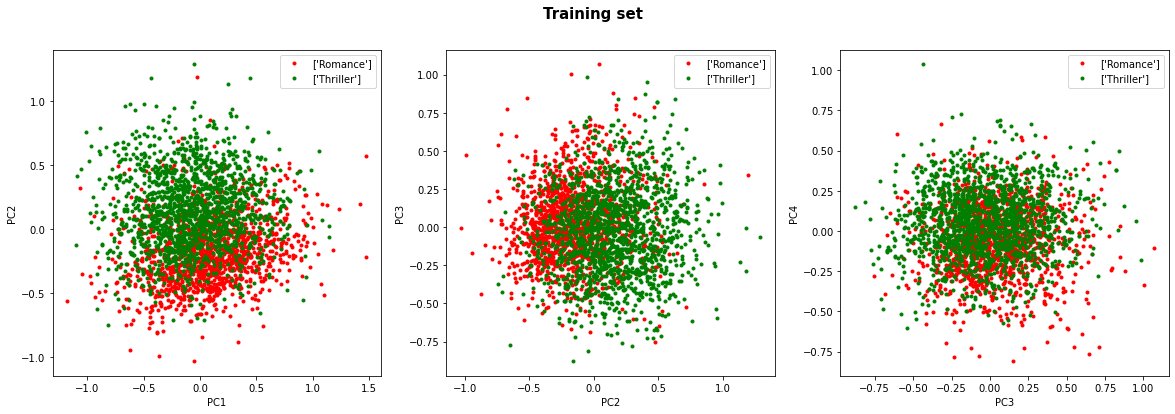

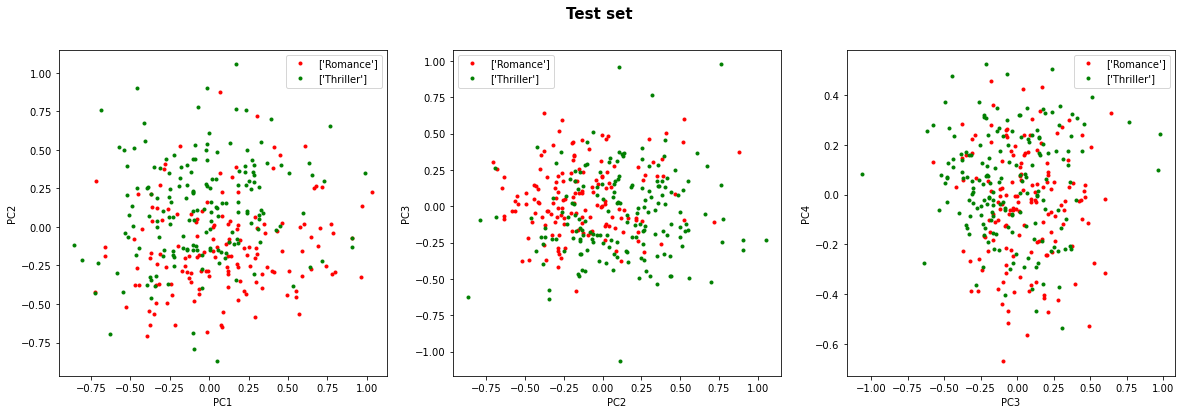

In [223]:

feats_train = np.stack(feats_train)
feats_test  = np.stack(feats_test)
train_labels= np.array(train_labels)
test_labels = np.array(test_labels)

pca         = PCA(n_components=100)
Vtrain      = pca.fit_transform(feats_train)
Vtest       = pca.transform(feats_test)

colors = 'rgbk'
for c, Z, title in zip([train_labels, test_labels], [Vtrain, Vtest], ['Training set', 'Test set']):

    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    for i in range(n_classes):
        plt.plot(Z[c==i, 0], Z[c==i, 1], '.', color=colors[i], label=le.inverse_transform([i]))
    plt.legend()
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.subplot(1, 3, 2)
    for i in range(n_classes):
        plt.plot(Z[c==i, 1], Z[c==i, 2], '.', color=colors[i], label=le.inverse_transform([i]))
    plt.legend()
    plt.xlabel('PC2')
    plt.ylabel('PC3')

    plt.subplot(1, 3, 3)
    for i in range(n_classes):
        plt.plot(Z[c==i, 2], Z[c==i, 3], '.', color=colors[i], label=le.inverse_transform([i]))
    plt.legend()
    plt.xlabel('PC3')
    plt.ylabel('PC4')
    plt.suptitle(title, fontweight='bold', fontsize=15)




In [ ]:
plt.plot(pca.explained_variance_ratio_,"--*");
plt.xlabel("Number of components");

# Classify

In [224]:
from scipy.stats import multivariate_normal as mvn
means = []
covs = []
n_components = 10

Z, c = Vtrain, train_labels
for i in range(n_classes):
    means.append(np.mean(Z[c==i, :n_components], axis=0))
    covs.append(np.cov(Z[c==i, :n_components].T))


In [225]:
logps = np.zeros((len(test_labels), n_classes))

# assuming equal priors
for n in tqdm(range(len(test_labels))):
    for i in range(n_classes):
        logps[n, i] = mvn.logpdf(Vtest[n, :n_components], means[i], covs[i])

pred = np.argmax(logps, axis=1)

100%|██████████| 323/323 [00:00<00:00, 2954.03it/s]


In [226]:
print('Test accuracy: %3.2f' % np.mean(pred == test_labels))

Test accuracy: 0.74


In [227]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
train_scores    = []
test_scores     = []
Ks              = list(range(1,51))
for k in Ks:
    clf = KNeighborsClassifier(k)
    clf.fit(Vtrain[:,:n_components], train_labels)
    test_scores.append(clf.score(Vtest[:,:n_components], test_labels))
    train_scores.append(clf.score(Vtrain[:,:n_components], train_labels))


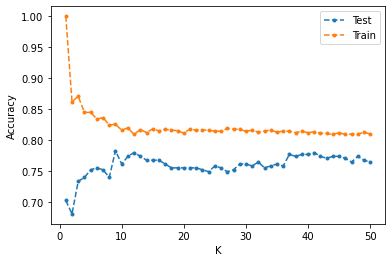

In [228]:
plt.plot(Ks,test_scores,"--.",label="Test");
plt.plot(Ks,train_scores,"--.",label="Train");
plt.legend();
plt.xlabel("K");
plt.ylabel("Accuracy");

In [ ]:
print(np.max(test_scores))

In [110]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(Vtrain[:,:n_components], train_labels)
print("Train accuracy:",NB.score(Vtrain[:,:n_components], train_labels))
print("Test accuracy:",NB.score(Vtest[:,:n_components], test_labels))

Train accuracy: 0.7657992565055762
Test accuracy: 0.7843866171003717


# Text Classification using 3-gram embeddings

In [111]:
#########################################################################################################
# Adapted from: https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html
#########################################################################################################

import numpy as np
import random
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
import time
import torch.nn as nn
import torch.nn.functional as F
from torchtext.data.utils import ngrams_iterator
from torchtext.data.utils import get_tokenizer
from torchtext.datasets import TextClassificationDataset
from torchtext.vocab import Vocab
from torchtext.vocab import build_vocab_from_iterator

#####################################################################################################################
# Auxilary functions
#####################################################################################################################

tokenizer = get_tokenizer("basic_english")


def token_iterator(texts, ngrams):
    for text in texts:
        tokens = tokenizer(text)
        yield ngrams_iterator(tokens, ngrams)


def construct_vocab(texts, ngrams):
    vocab = build_vocab_from_iterator(token_iterator(texts, ngrams))
    return vocab


def text_to_tensor(text, vocab, ngrams):
    tokens = ngrams_iterator(tokenizer(text), ngrams=ngrams)
    token_ids = list(filter(lambda x: x is not Vocab.UNK, [vocab[token] for token in tokens]))
    tokens = torch.tensor(token_ids)
    return tokens


def make_torchdataset(vocab, texts, labels, ngrams):
    tokens = [text_to_tensor(text, vocab, ngrams) for text in tqdm(texts)]
    pairs = list(zip(labels, tokens))
    return TextClassificationDataset(vocab, pairs, set(labels))

def generate_batch(batch):
    label = torch.tensor([entry[0] for entry in batch])
    text = [entry[1] for entry in batch]
    offsets = [0] + [len(entry) for entry in text]
    # torch.Tensor.cumsum returns the cumulative sum
    # of elements in the dimension dim.
    # torch.Tensor([1.0, 2.0, 3.0]).cumsum(dim=0)

    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text = torch.cat(text)
    return text, offsets, label

#####################################################################################################################
# Model
#####################################################################################################################


class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

#####################################################################################################################
# FastText
#####################################################################################################################


class FastText(object):

    def __init__(self, texts, labels, embed_dim, ngrams=3, num_epochs=5, seed=0):

        # set seed
        np.random.seed(seed)
        random.seed(seed)
        torch.manual_seed(seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed_all(seed)


        self.texts = texts
        self.labels = labels
        self.embed_dim = embed_dim
        self.ngrams = ngrams

        # construct vocab
        print('Constructing vocabulary...')
        self.vocab = construct_vocab(texts, ngrams)
        self.vocab_size = len(self.vocab)

        # prepare dataset
        print('Preparing dataset...')
        self.train_dataset = make_torchdataset(self.vocab, texts, labels, ngrams)
        self.num_classes = len(self.train_dataset.get_labels())

        # prepare device ref and model
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = TextClassificationModel(self.vocab_size, self.embed_dim, self.num_classes).to(self.device)

        # loss function & optimization
        self.criterion = torch.nn.CrossEntropyLoss().to(self.device)
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=4.0)
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, 1, gamma=0.9)
        self.batch_size = 16

        self.tokenizer = get_tokenizer("basic_english")
        self.ngrams = ngrams



        if num_epochs > 0:
            print('Training model...')
            self.train(self.train_dataset, num_epochs)


    def train_step(self, sub_train_):

        # Train the model
        train_loss = 0
        train_acc = 0
        data = DataLoader(sub_train_, batch_size=self.batch_size, shuffle=True, collate_fn=generate_batch)
        for i, (text, offsets, cls) in enumerate(data):
            self.optimizer.zero_grad()
            text, offsets, cls = text.to(self.device), offsets.to(self.device), cls.to(self.device)
            output = self.model(text, offsets)
            loss = self.criterion(output, cls)
            train_loss += loss.item()
            loss.backward()
            self.optimizer.step()
            train_acc += (output.argmax(1) == cls).sum().item()

        # Adjust the learning rate
        self.scheduler.step()

        return train_loss / len(sub_train_),  train_acc / len(sub_train_)

    def compute_loss(self, data_):
        loss = 0
        acc = 0
        data = DataLoader(data_, batch_size=self.batch_size, collate_fn=generate_batch)
        for text, offsets, cls in data:
            text, offsets, cls = text.to(self.device), offsets.to(self.device), cls.to(self.device)
            with torch.no_grad():
                output = self.model(text, offsets)
                loss = self.criterion(output, cls)
                loss += loss.item()
                acc += (output.argmax(1) == cls).sum().item()

        return loss / len(data_), acc / len(data_)

    def train(self, train_dataset, n_epochs=5):

        min_valid_loss = float('inf')

        for epoch in range(n_epochs):
            start_time = time.time()
            train_loss, train_acc  = self.train_step(train_dataset)

            secs = int(time.time() - start_time)
            mins = secs / 60
            secs = secs % 60

            print('Epoch: %d' % (epoch + 1), " | time in %d minutes, %d seconds" % (mins, secs))
            print(f'\tLoss: {train_loss:.4f}(train)\t|\tAcc: {train_acc * 100:.1f}%(train)')
        print('')

    def predict(self, text_, return_prob=False):

        with torch.no_grad():
            text = text_to_tensor(text_, self.vocab, self.ngrams)
            output = self.model(text, torch.tensor([0]))

            if return_prob:
                return F.softmax(output, 1).detach().numpy()
            else:
                return output.argmax(1).item()

    def get_text_embedding(self, text_):
        with torch.no_grad():
            text = text_to_tensor(text_, self.vocab, self.ngrams)
            return self.model.embedding(text, offsets=torch.LongTensor([0])).detach().numpy()

    def word_in_vocab(self, word):
        return word in self.vocab.stoi





In [229]:
model = FastText(train_texts,train_labels,embed_dim=100,num_epochs=20)

2905lines [00:01, 2492.12lines/s]
100%|██████████| 2905/2905 [00:02<00:00, 1162.70it/s]


Constructing vocabulary...
Preparing dataset...
Training model...
Epoch: 1  | time in 0 minutes, 2 seconds
	Loss: 0.0521(train)	|	Acc: 51.8%(train)
Epoch: 2  | time in 0 minutes, 2 seconds
	Loss: 0.0427(train)	|	Acc: 62.3%(train)
Epoch: 3  | time in 0 minutes, 2 seconds
	Loss: 0.0368(train)	|	Acc: 68.7%(train)
Epoch: 4  | time in 0 minutes, 2 seconds
	Loss: 0.0301(train)	|	Acc: 76.5%(train)
Epoch: 5  | time in 0 minutes, 2 seconds
	Loss: 0.0238(train)	|	Acc: 84.3%(train)
Epoch: 6  | time in 0 minutes, 2 seconds
	Loss: 0.0189(train)	|	Acc: 89.7%(train)
Epoch: 7  | time in 0 minutes, 2 seconds
	Loss: 0.0152(train)	|	Acc: 92.8%(train)
Epoch: 8  | time in 0 minutes, 2 seconds
	Loss: 0.0122(train)	|	Acc: 95.1%(train)
Epoch: 9  | time in 0 minutes, 2 seconds
	Loss: 0.0098(train)	|	Acc: 97.5%(train)
Epoch: 10  | time in 0 minutes, 2 seconds
	Loss: 0.0083(train)	|	Acc: 98.0%(train)
Epoch: 11  | time in 0 minutes, 2 seconds
	Loss: 0.0071(train)	|	Acc: 98.6%(train)
Epoch: 12  | time in 0 minutes

In [230]:
y_preds = []
for test_text in test_texts:
    y_pred = model.predict(test_text, return_prob=False)
    y_preds.append(y_pred)

In [231]:
print("Fast-text test accuracy:",accuracy_score(test_labels,y_preds))

Fast-text test accuracy: 0.7523219814241486


# PCA on fasttext embeddings

In [232]:
feats_train = []
feats_test = []
for train_text in train_texts:
    feats_train.append(model.get_text_embedding(train_text))
for test_text in test_texts:
    feats_test.append(model.get_text_embedding(test_text))
feats_train = np.array(feats_train).squeeze()
feats_test = np.array(feats_test).squeeze()


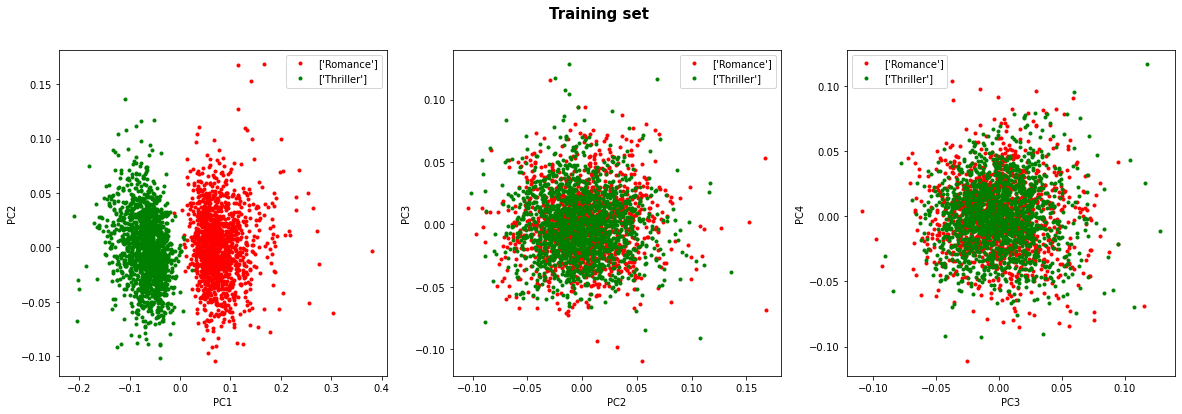

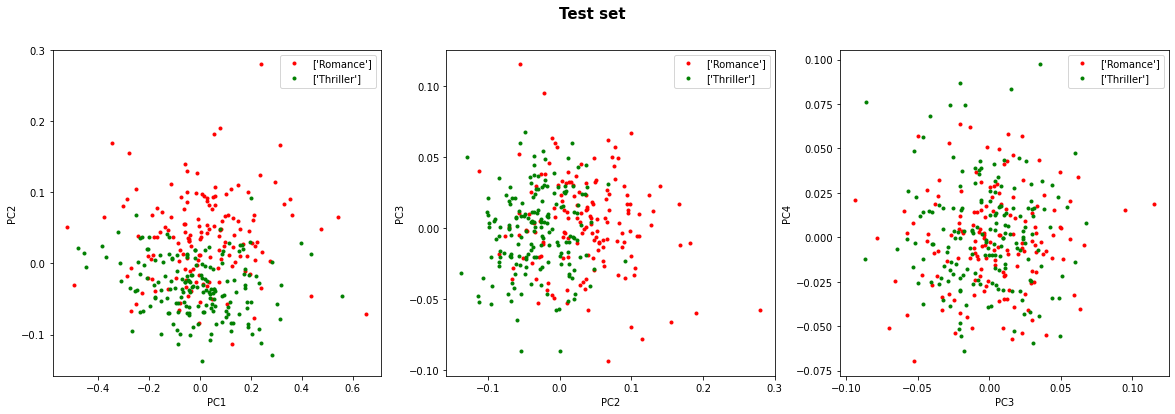

In [233]:
pca2 = PCA(n_components=4)
Vtrain = pca2.fit_transform(feats_train)
Vtest = pca2.fit_transform(feats_test)


colors = 'rgbk'
for c, Z, title in zip([train_labels, test_labels], [Vtrain, Vtest], ['Training set', 'Test set']):

    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    for i in range(n_classes):
        plt.plot(Z[c==i, 0], Z[c==i, 1], '.', color=colors[i], label=le.inverse_transform([i]))
    plt.legend()
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.subplot(1, 3, 2)
    for i in range(n_classes):
        plt.plot(Z[c==i, 1], Z[c==i, 2], '.', color=colors[i], label=le.inverse_transform([i]))
    plt.legend()
    plt.xlabel('PC2')
    plt.ylabel('PC3')

    plt.subplot(1, 3, 3)
    for i in range(n_classes):
        plt.plot(Z[c==i, 2], Z[c==i, 3], '.', color=colors[i], label=le.inverse_transform([i]))
    plt.legend()
    plt.xlabel('PC3')
    plt.ylabel('PC4')
    plt.suptitle(title, fontweight='bold', fontsize=15)


# Write your own plot and see what genre GloVe+PCA+classifier and FastText guess it is

In [ ]:
movieplot = "A little boy is playing with his toys when an owl flies into his bedroom. The owl starts explaining that the boy has three wishes, and they then embark on a journey full of adventures and fun."


y_pred          = model.predict(movieplot, return_prob=False)
words           = clean(movieplot).split()
glove_embedding = np.mean([dictionary[word] for word in words if word in dictionary], 0)
z_plot          = pca.transform(glove_embedding[:,np.newaxis].T)

print("FastText thinks the genre is:",categories[y_pred])
print("GloVe thinks it is:",categories[NB.predict(z_plot[:,:n_components])[0]])